<a href="https://colab.research.google.com/github/EdwinSanFI/Machine-Learning/blob/master/Fundamentos_Pr%C3%A1cticos_Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
dataset = pd.read_csv('salarios.csv')
dataset.head()
dataset

,Aexperiencia,Salario
0,10.0,42500
1,8.0,36302
2,5.4,35000
3,2.5,18103
4,1.0,15000
5,8.0,37000
6,4.0,26300
7,6.0,35201
8,2.0,18302
9,10.0,42000


# Sección nueva

# Sección nueva

In [4]:
dataset.shape

(30, 2)

In [5]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:, 1].values

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [7]:
x_train

array([[10. ],
       [ 7. ],
       [ 2. ],
       [ 5.3],
       [ 8. ],
       [ 3. ],
       [ 2. ],
       [ 2. ],
       [ 2.1],
       [ 5. ],
       [ 8. ],
       [ 1. ],
       [ 4. ],
       [ 1. ],
       [ 3. ],
       [ 2. ],
       [10. ],
       [ 6. ],
       [10. ],
       [ 2.5],
       [10. ],
       [ 3.4],
       [ 5. ],
       [ 3. ]])

In [8]:
regressor = LinearRegression()
#Para entrenar un modelo, pasa 2 valores, X & Y

regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

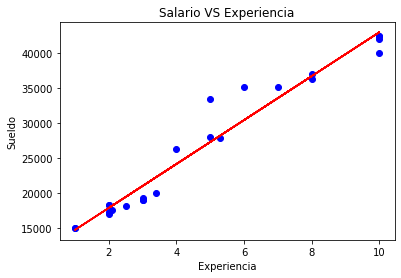

In [9]:
viz_train = plt
viz_train.scatter(x_train, y_train, color = 'b')
viz_train.plot(x_train, regressor.predict(x_train), color='r')
viz_train.title('Salario VS Experiencia')
viz_train.xlabel('Experiencia')
viz_train.ylabel('Sueldo')
viz_train.show()


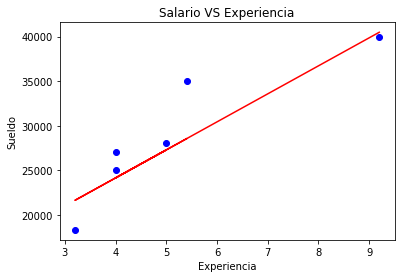

In [10]:
viz_train = plt
viz_train.scatter(x_test, y_test, color = 'b')
viz_train.plot(x_test, regressor.predict(x_test), color='r')
viz_train.title('Salario VS Experiencia')
viz_train.xlabel('Experiencia')
viz_train.ylabel('Sueldo')
viz_train.show()

In [11]:
regressor.score(x_test, y_test)

0.7862437374732997

In [12]:
#EJERCICIO EXTRA

dataset = pd.read_csv('salarios.csv')
paises = ['VZ','MX','CO','BR','AR','US']
new_column = [paises[np.random.randint(0,len(paises))] for i in range(30) ]
dataset['Pais'] = new_column
dataset['NormPaises'] = pd.factorize(dataset['Pais'])[0]
x = dataset[['Aexperiencia','NormPaises']]
y = dataset['Salario']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.6, random_state=0)
regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)

0.9348965772083633

Text(0.5, 0, '$Salario$')

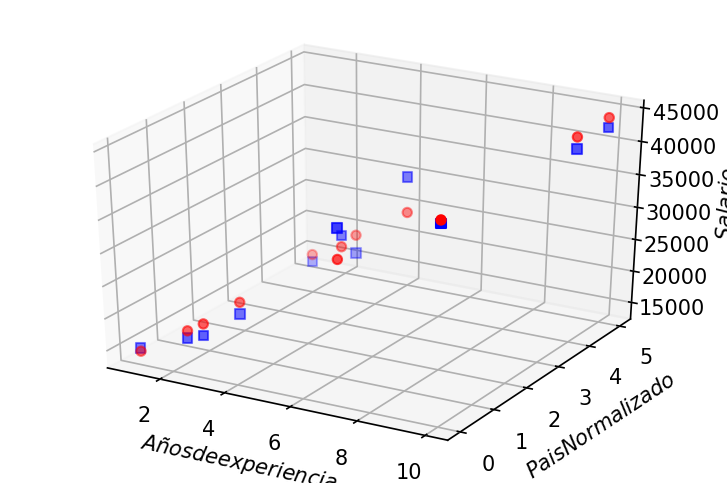

In [13]:
fig = plt.figure(dpi = 150)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['Aexperiencia'],X_train['NormPaises'],y_train,c='b',marker='s')
ax.scatter(X_train['Aexperiencia'],X_train['NormPaises'],regressor.predict(X_train),c='r',marker='o')
ax.set_xlabel('$Años de experiencia$')
ax.set_ylabel('$Pais Normalizado$')
ax.set_zlabel('$Salario$')

In [21]:
#EJERCICIO EXTRA 2

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing

# defino los paises en list paises
paises = ['CO','BR','PE','MX']

# llevo cada elemento de paises a que sea convertido a un numero
le1 = preprocessing.LabelEncoder()
paises_encoded = le1.fit_transform(paises)

# de forma aleatoria creo 30 elementos para dataset
paises_dataset = [random.choice(paises_encoded) for i in range(len(dataset))]

# paises codificados y en lista pasados al dataset
dataset['pais'] = paises_dataset


In [22]:
# Dividiendo las columnas en x y y
x = dataset.drop('Salario', axis=1)
y = dataset.iloc[:,1].values

# dividimos nuestro dataset
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Invocamos el modelo y creamos el modelo con .fit
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# Evaluamos performance
print(regressor.score(X_test, Y_test))


ValueError: ignored

NotFittedError: ignored

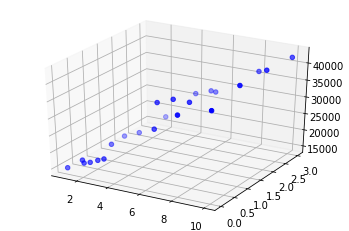

In [23]:
# ploteamos datos de entrenamiento para ver si realmente el 
# modelo lo hizo bien, se entreno como se debe
fig = plt.figure()
viz_train = fig.add_subplot(111, projection='3d')
viz_train.scatter(X_train['Aexperiencia'],X_train['pais'], Y_train, color = 'blue')
viz_train.plot_trisurf(X_train['Aexperiencia'],X_train['pais'], regressor.predict(X_train),color = 'black', alpha = 0.5)
viz_train.set_title('Salario Experiencia y pais')
viz_train.set_xlabel('Experiencia')
viz_train.set_ylabel('Pais')
viz_train.set_zlabel('Salario')
viz_train.set_yticks(range(len(paises_encoded)))
viz_train.set_yticklabels(le1.inverse_transform(paises_encoded))
viz_train.azim=-10
fig.show


NotFittedError: ignored

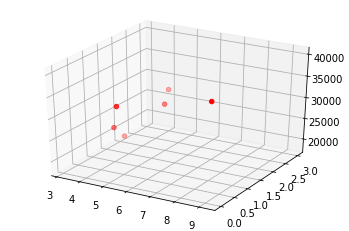

In [24]:
# probamos con datos de test
fig = plt.figure()
viz_train = fig.add_subplot(111, projection='3d')
viz_train.scatter(X_test['Aexperiencia'],X_test['pais'], Y_test, color = 'red')
viz_train.plot_trisurf(X_train['Aexperiencia'], X_train['pais'], regressor.predict(X_train),color = 'black', alpha = 0.5)
viz_train.set_title('Salario Experiencia y pais')
viz_train.set_xlabel('Experiencia')
viz_train.set_ylabel('Pais')
viz_train.set_zlabel('Salario')
viz_train.set_yticks(range(len(paises_encoded)))
viz_train.set_yticklabels(le1.inverse_transform(paises_encoded))
viz_train.azim=-10
fig.show

Dataset inicial

    Aexperiencia  Salario Pais  IDPais
0          10.0    42500   BR       0
1           8.0    36302   US       1
2           5.4    35000   MX       2
3           2.5    18103   CO       3
4           1.0    15000   PE       4

El porcentaje de ajuste es:  86.33575126752844 %



<bound method Figure.show of <Figure size 900x600 with 1 Axes>>

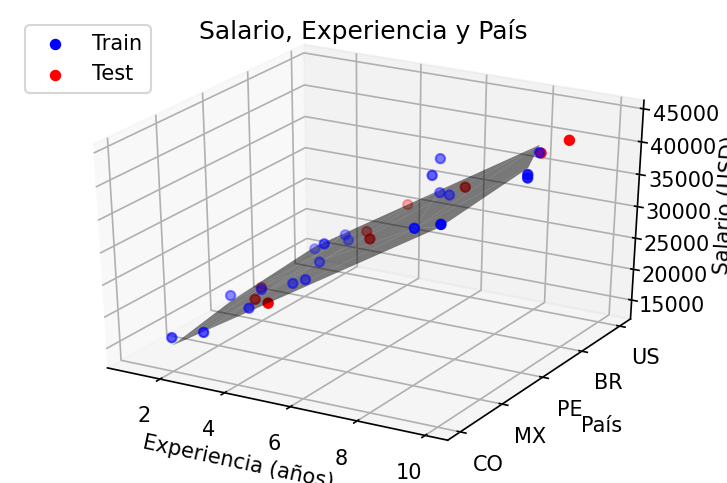

In [25]:
# EJERCCIO EXTRA 3
# Modificar dataset agregando columan de país y hacer regresión múltiple
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split #para dividir los datos
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

dataset = pd.read_csv('salarios.csv')

#Agregar columna países
paises = ['CO', 'MX', 'PE', 'BR', 'US'] 
dataset['Pais'] = [paises[np.random.randint(0,len(paises))] for i in range(len(dataset)) ]
dataset['IDPais'] = pd.factorize(dataset['Pais'])[0]
print('Dataset inicial\n\n', dataset.head())

#Asigno valores para x,y
x = dataset[['Aexperiencia','IDPais']]
y = dataset['Salario']
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.3, random_state=0)
regressor.fit(X_train, Y_train)
ajuste = regressor.score(X_test,Y_test)
print('\nEl porcentaje de ajuste es: ', ajuste*100, '%\n')

#Grafico de los resultados de entrenamiento
fig = plt.figure(dpi=150)
viz_train = fig.add_subplot(111, projection='3d')
viz_train.scatter(X_train['Aexperiencia'], X_train['IDPais'], Y_train, color = 'blue', label = 'Train')
viz_train.scatter(X_test['Aexperiencia'], X_test['IDPais'], regressor.predict(X_test), color = 'red', label = 'Test')
viz_train.plot_trisurf(X_train['Aexperiencia'],X_train['IDPais'], regressor.predict(X_train),color = 'black', alpha = 0.5)
viz_train.set_title('Salario, Experiencia y País')
viz_train.set_xlabel('Experiencia (años)')
viz_train.set_ylabel('País')
viz_train.set_zlabel('Salario (USD)')
viz_train.set_yticks(range(len(paises)))
viz_train.set_yticklabels(paises)
plt.legend(loc="upper left") 
fig.show